## 1. Import Required Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Define Gauss-Hermite LSF Generation Function
We extract the implementation from `build_dataset.py` for testing.

In [8]:
def generate_lsf_kernel(sigma_pix, h3, h4, size_sigma=5):
    """
    Generate Gauss-Hermite LSF kernel using standard orthonormal polynomials.
    """
    # Create grid in pixels
    half_size = int(np.ceil(size_sigma * sigma_pix))
    x = np.arange(-half_size, half_size + 1)
    
    # Normalized coordinate
    y = x / sigma_pix
    
    # Gaussian part
    gauss = np.exp(-0.5 * y**2) / (np.sqrt(2 * np.pi) * sigma_pix)
    
    # Standard orthonormal Hermite polynomials (van der Marel 1993)
    H3 = (2*np.sqrt(2)*y**3 - 3*np.sqrt(2)*y) / np.sqrt(6)
    H4 = (4*y**4 - 12*y**2 + 3) / np.sqrt(24)
    
    # Combine
    kernel = gauss * (1 + h3 * H3 + h4 * H4)
    
    # Normalize kernel to sum to 1
    kernel /= np.sum(kernel)
    
    return x, kernel


## 3. Configure Grid and Resolution Parameters
We use the constants defined in the pipeline to determine the typical $\sigma_{pix}$ for a given resolution.

In [9]:
WAVE_START = 4040.0
WAVE_END = 6850.0
WAVE_STEP_REF = 0.05  # at 4040 A
LOG_WAVE_STEP = WAVE_STEP_REF / WAVE_START

# Calculate sigma for a resolution of 20,000
resol = 20000
lambda_center = (WAVE_START + WAVE_END) / 2.0
r_eff = lambda_center / resol
sigma_pix = 1.0 / (r_eff * LOG_WAVE_STEP * 2.355)

print(f"Typical resolution: {resol}")
print(f"Calculated sigma_pix: {sigma_pix:.4f} pixels")

Typical resolution: 20000
Calculated sigma_pix: 126023.7971 pixels


## 4. Generate and Plot LSF Kernel Variations

We will compare:
1.  **Pure Gaussian**: $h_3=0, h_4=0$
2.  **Asymmetric (Skewed)**: $h_3 \neq 0$
3.  **Kurtotic (Broad/Sharp Wings)**: $h_4 \neq 0$

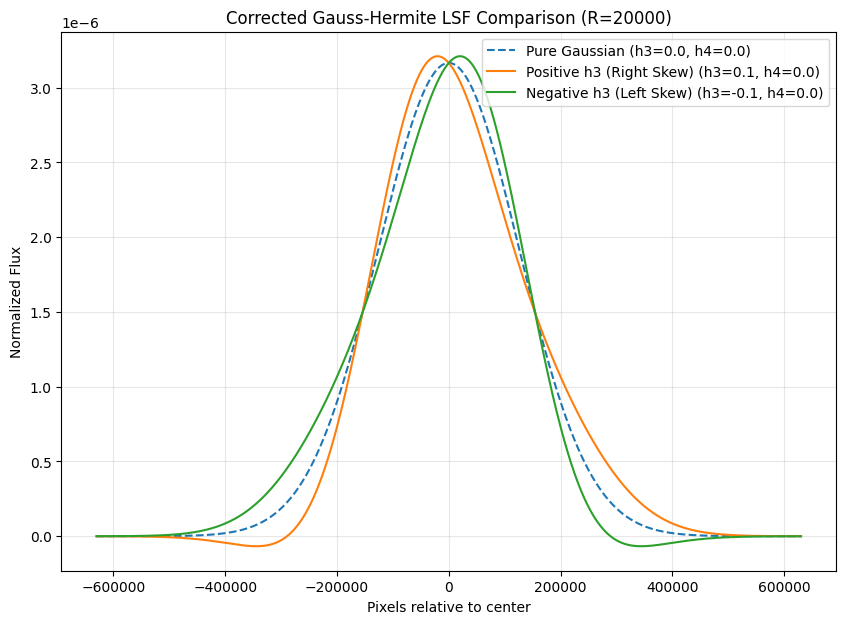

Kernel remains positive-definite within tested ranges.


In [17]:
plt.figure(figsize=(10, 7))

# Parameters to test
# We use larger values here to make the effects clearly visible
h_values = [
    (0.0, 0.0, 'Pure Gaussian'),
    (0.1, 0.0, 'Positive h3 (Right Skew)'),
    (-0.1, 0.0, 'Negative h3 (Left Skew)')
]


for h3, h4, label in h_values:
    x_k, kernel = generate_lsf_kernel(sigma_pix, h3, h4)
    plt.plot(x_k, kernel, label=f"{label} (h3={h3}, h4={h4})", 
             ls='--' if h3==0 and h4==0 else '-')

plt.title(f"Corrected Gauss-Hermite LSF Comparison (R={resol})")
plt.xlabel("Pixels relative to center")
plt.ylabel("Normalized Flux")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Verification: check for negative values
h3_test, h4_test = 0.1, 0.1
_, k_test = generate_lsf_kernel(sigma_pix, h3_test, h4_test)
if np.any(k_test < 0):
    print(f"Warning: Kernel with h3={h3_test}, h4={h4_test} has negative values. Lower the ranges.")
else:
    print("Kernel remains positive-definite within tested ranges.")

/home/minjihk/projects/def-sfabbro/minjihk/WEAVE_Pristine/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


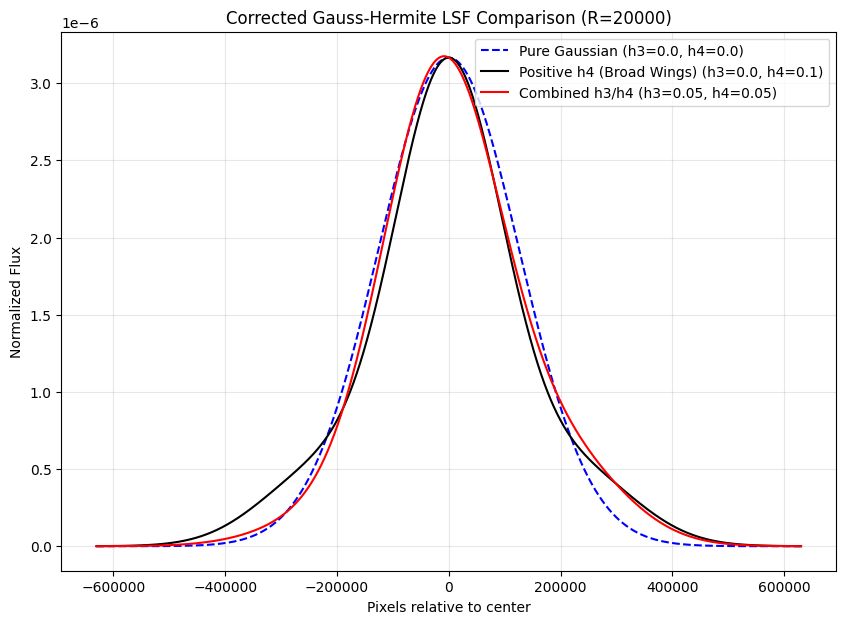

Kernel remains positive-definite within tested ranges.


In [16]:
plt.figure(figsize=(10, 7))

# Parameters to test
# We use larger values here to make the effects clearly visible
h_values = [
    (0.0, 0.0, 'Pure Gaussian', 'b'),
    (0.0, 0.1, 'Positive h4 (Broad Wings)', 'k'),
    (0.05, 0.05, 'Combined h3/h4', 'r')
]


for h3, h4, label, color in h_values:
    x_k, kernel = generate_lsf_kernel(sigma_pix, h3, h4)
    plt.plot(x_k, kernel, label=f"{label} (h3={h3}, h4={h4})", color=color,
             ls='--' if h3==0 and h4==0 else '-')

plt.title(f"Corrected Gauss-Hermite LSF Comparison (R={resol})")
plt.xlabel("Pixels relative to center")
plt.ylabel("Normalized Flux")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Verification: check for negative values
h3_test, h4_test = 0.1, 0.1
_, k_test = generate_lsf_kernel(sigma_pix, h3_test, h4_test)
if np.any(k_test < 0):
    print(f"Warning: Kernel with h3={h3_test}, h4={h4_test} has negative values. Lower the ranges.")
else:
    print("Kernel remains positive-definite within tested ranges.")